In [1]:
options(repr.plot.width=8,repr.plot.height=4)

In [2]:
library(DBI)

In [3]:
con <- dbConnect(RSQLite::SQLite(), 'datasets/wjazzd.db')

In [4]:
solos <- dbReadTable(con, 'solo_info')

In [5]:
solos.44 <- solos[solos$signature == '4/4',]

In [6]:
melody <- dbReadTable(con, 'melody')

In [7]:
s <- solos.44[solos.44$melid == 1,]

In [8]:
m <- melody[melody$melid == 1,]

In [9]:
table(solos.44$key)


            A-min       Ab   Ab-maj   Ab-mix    B-maj Bb-blues   Bb-maj 
      18        2        1       33        1        2        1       74 
  Bb-min  C-chrom    C-maj    C-min   C#-maj  D-chrom    D-dor    D-maj 
       3        2       35       20        1        3        1       10 
   D-min   D#-maj Db-chrom   Db-maj   Db-min    E-min Eb-chrom   Eb-maj 
       9        1        1       31        1        2        1       55 
  Eb-min    F-maj    F-min F#-chrom   F#-min    G-maj    G-min 
       4       69       11        1        3       24       15 

In [10]:
solos.44.wk <- solos.44[solos.44$key != '',]

In [11]:
key.name <- function(full_name) {
    strsplit(full_name, '-')[[1]][1]
}

In [12]:
unique(sapply(sapply(solos.44.wk$key, key.name), tolower))

[1] "bb" "eb" "f"  "db" "c"  "g"  "ab" "d"  "f#" "e"  "a"  "b"  "d#" "c#"

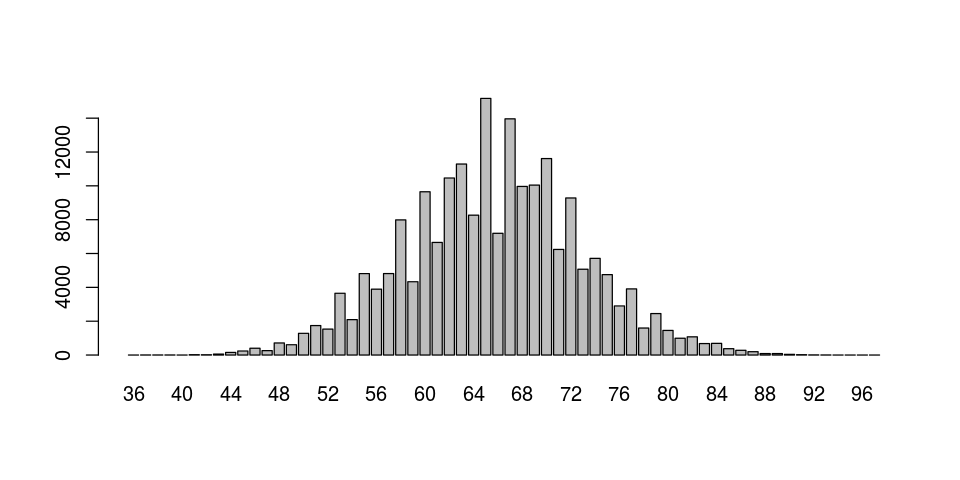

In [13]:
barplot(table(melody$pitch))

In [14]:
notes = list(
    c('c'), c('c#', 'db'), c('d'), c('d#', 'eb'), 
    c('e'), c('f'), c('f#', 'gb'), c('g'), 
    c('g#', 'ab'), c('a'), c('a#', 'bb'), c('b')
)
notes.to.midi_base = list()
for (i in 1:length(notes)) {
    for (note_name in notes[[i]]) {
        notes.to.midi_base[[note_name]] = i - 1
    }
}
key.to.midi.tonic <- function(key_name) {
    notes.to.midi_base[[tolower(key.name(key_name))]]
}

In [15]:
solos.key.midi = sapply(solos.44.wk$key, key.to.midi.tonic, USE.NAMES=F)

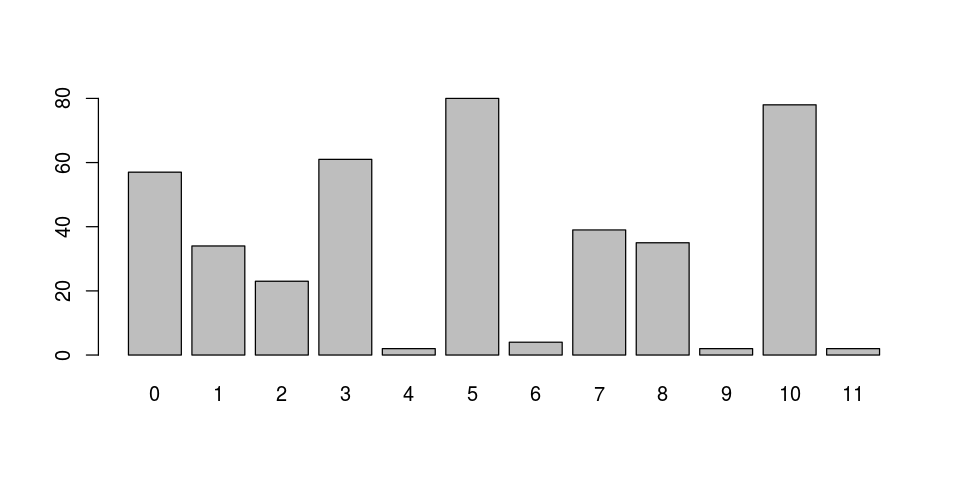

In [16]:
barplot(table(solos.key.midi))

In [17]:
melody.44.wk <- melody[melody$melid %in% solos.44.wk$melid,]

In [36]:
tonic_pitch_classes <- function(melid) {
    pitches <- melody.44.wk$pitch[melody.44.wk$melid == melid]
    normed_pitches <- pitches %% 12
    midi_key <- solos.key.midi[solos.44.wk$melid == 1]
    relative_pitches <- (normed_pitches - midi_key) %% 12
    relative_pitches
}

In [37]:
all.tcp = c()
for (melid in solos.44.wk$melid) {
    all.tcp = c(all.tcp, tonic_pitch_classes(melid))
}

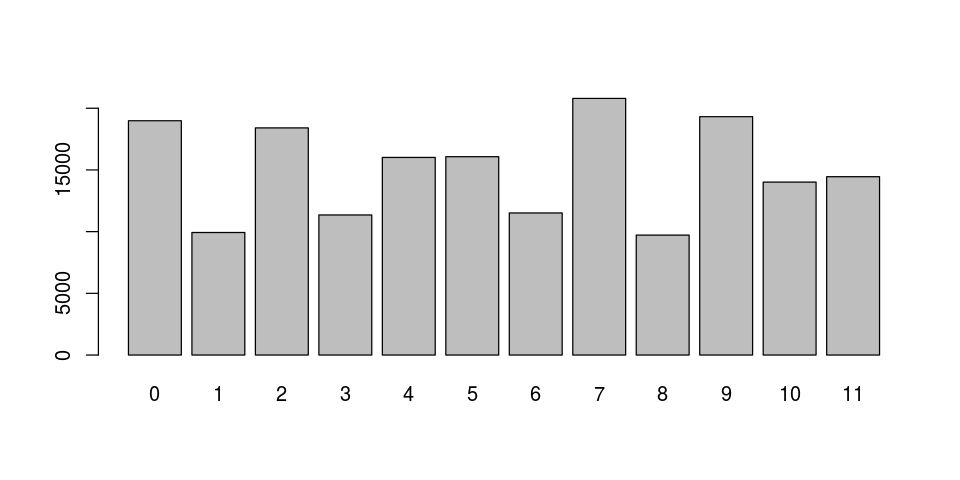

In [39]:
barplot(table(all.tcp))